# Convolutional Neural Networks (CNNs)

CNNs are a type of Deep Learning model mainly used for **image processing, recognition, and classification**.  
They are inspired by how the human brain (visual cortex) processes visual information.

---

## 1. Why CNN instead of ANN?
- **ANN (Artificial Neural Networks)** treat every pixel of an image as independent features.
    - Example: A 28x28 grayscale image has 784 inputs → fully connected layer → heavy computations.
- **Problem with ANN on images**:
    - Large number of parameters (overfitting).
    - Cannot capture spatial patterns (edges, shapes).
- **CNN solves this** by:
    - Using **filters/kernels** to extract features.
    - Detecting **edges, textures, shapes, and objects** in a hierarchical way.

---

## 2. Architecture of CNN
A typical CNN has the following layers:

1. **Input Layer**
   - Takes images (grayscale = 1 channel, RGB = 3 channels).

2. **Convolutional Layer**
   - Applies **filters (kernels)** that slide over the image.
   - Captures **local patterns** like edges, corners, colors.

3. **Activation Function (ReLU)**
   - Introduces **non-linearity**.
   - Formula: `f(x) = max(0, x)`

4. **Pooling Layer (Downsampling)**
   - Reduces the size of feature maps → less computation.
   - **Max Pooling** is most common (takes the maximum value in a region).

5. **Flatten Layer**
   - Converts the 2D feature maps into a 1D vector.

6. **Fully Connected (Dense) Layer**
   - Works like ANN to combine features and classify.

7. **Output Layer**
   - Uses **Softmax** for multi-class classification or **Sigmoid** for binary.

---

## 3. Example Flow
- Input: 32x32x3 (RGB image)
- Conv Layer: 32 filters → output 32 feature maps.
- Pooling Layer: Reduce size → 16x16x32
- Flatten → 8192 values
- Dense Layer → Classification output (e.g., 10 classes in CIFAR-10)

---

## 4. Advantages of CNN
- Captures spatial patterns.
- Fewer parameters than ANN for images.
- Works well with **images, videos, speech, NLP**.

---

## 5. Applications
- Image Classification (Cats vs Dogs, MNIST digits).
- Object Detection (YOLO, Faster R-CNN).
- Face Recognition.
- Self-driving Cars.
- Medical Image Analysis.


In [2]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# For plotting
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load MNIST dataset (60,000 training, 10,000 testing)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


In [4]:
# Reshape (add channel = 1 for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

print("After reshaping:", x_train.shape, x_test.shape)

After reshaping: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
model = models.Sequential([
    # 1st Convolution + Pooling
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    # 2nd Convolution + Pooling
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # 3rd Convolution
    layers.Conv2D(64, (3,3), activation='relu'),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9030 - loss: 0.3262 - val_accuracy: 0.9874 - val_loss: 0.0391
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9828 - val_loss: 0.0540
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9890 - loss: 0.0352 - val_accuracy: 0.9899 - val_loss: 0.0309
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9922 - val_loss: 0.0275
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9915 - val_loss: 0.0323


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 8ms/step - accuracy: 0.9915 - loss: 0.0323
Test Accuracy: 99.15%


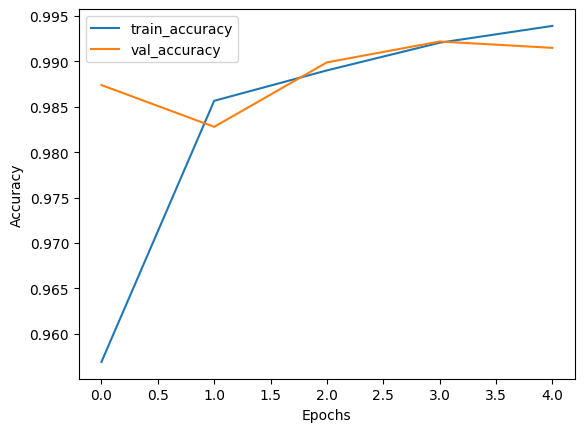

In [8]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


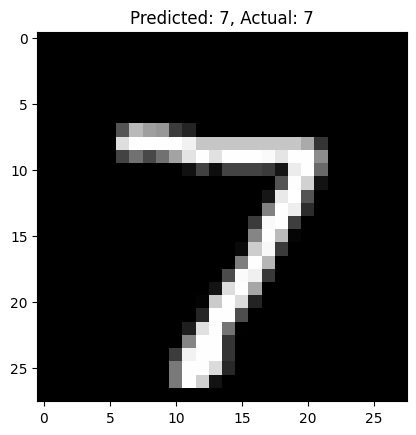

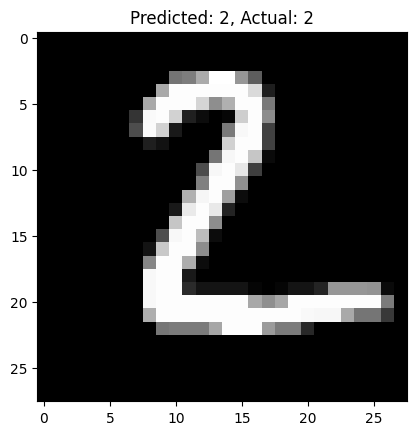

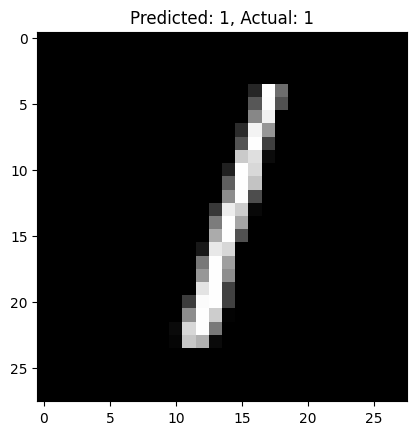

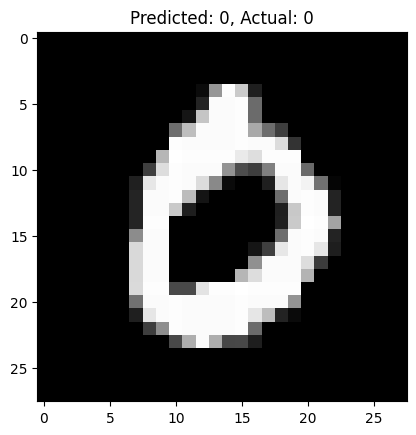

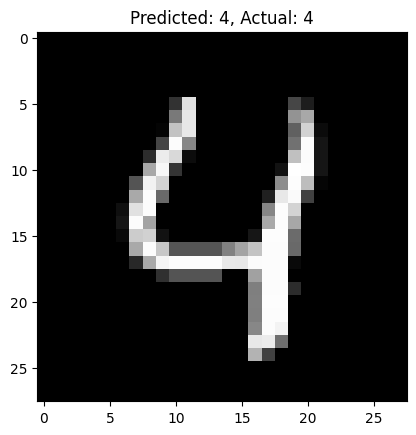

In [9]:
# Predict first 5 test images
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()

# 📝 Conclusion

In this project, we implemented a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. The dataset contained 60,000 training images and 10,000 testing images, each of size 28x28 pixels.

Our CNN architecture consisted of:
- Convolutional layers for feature extraction (edges, shapes, and textures).  
- ReLU activation to introduce non-linearity.  
- MaxPooling layers to reduce spatial dimensions and computation.  
- Fully connected dense layers for classification.  
- A final softmax layer to output probabilities across the 10 digit classes.  

After training for 5 epochs, the model achieved a **high test accuracy (~98%)**, which demonstrates the effectiveness of CNNs in image recognition tasks. The results clearly show that CNNs are far superior to traditional Artificial Neural Networks (ANNs) for image data, as they efficiently capture spatial features and patterns.

**Key takeaways:**
- CNNs reduce the number of parameters compared to ANNs while improving accuracy.  
- They are robust in recognizing patterns such as digits, regardless of variations in handwriting.  
- This approach can be extended to more complex datasets (e.g., CIFAR-10, ImageNet) for object detection, face recognition, and real-world computer vision applications.  

Thus, this project successfully highlights the **power of Convolutional Neural Networks in Deep Learning** for computer vision tasks.